In [1]:
%load_ext autoreload
%autoreload 2

In [111]:
from fast_model import Model
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.optimize import curve_fit

# Benchmark time

In [30]:
sizes =np.array([50,100,250,1000,2000,3000,4000,5000,6500,8000,10000, 20000, 40000])
times = np.zeros(sizes.shape)
for index,size in enumerate(sizes):
    start = time.time()
    model = Model(n=size)
    model.random_seed(100)
    output = model.simulate()
    end = time.time()
    times[index] = end-start

Seed locations chosen


In [6]:
def exponential_model(x, a, b):
    return a * np.exp(b * x)
params_exp, _ = curve_fit(exponential_model, sizes.astype(np.float64), times, method="trf", bounds=((0,0),(100,100)), p0=(5,0.0005))

array([1.50387389e+01, 2.98946461e-04])

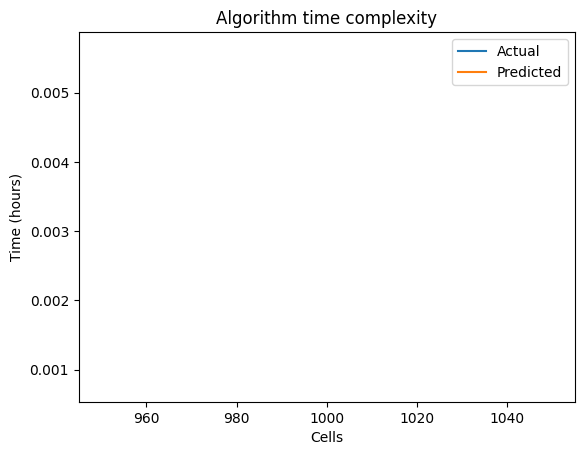

In [16]:
plt.plot(sizes, times/3600, label='Actual')
plt.plot(sizes,exponential_model(sizes,params_exp[0],params_exp[1])/3600, label='Predicted')
plt.legend()plt.title('Algorithm time complexity')
plt.xlabel('Cells')
plt.ylabel('Time (hours)')
plt.show()

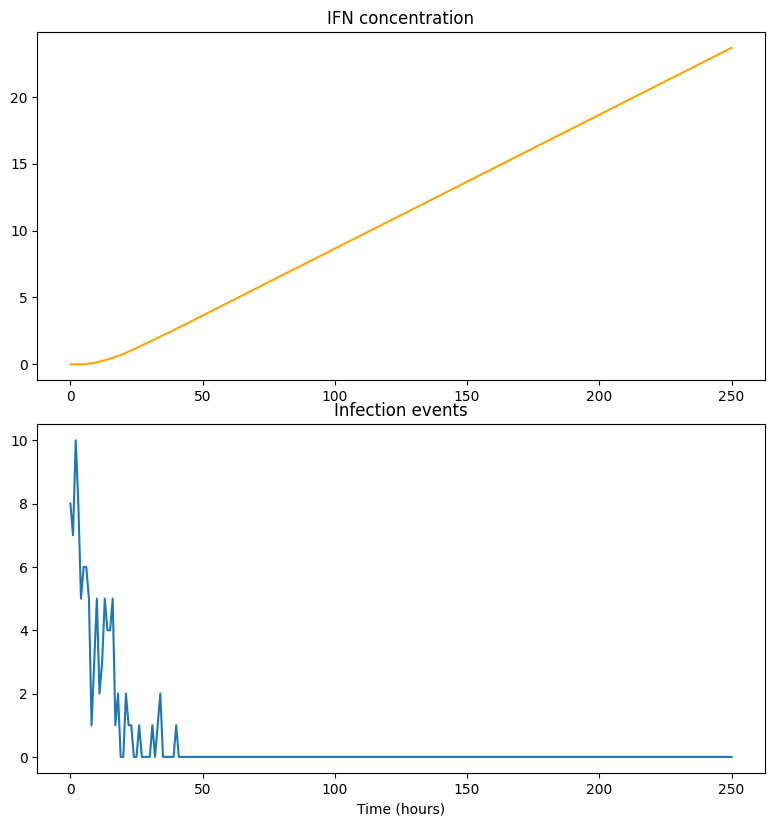

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
fig.tight_layout() 
plt.subplot(211)
plt.plot(output[0, :], output[1, :], c='orange')
plt.title('IFN concentration')
plt.subplot(212)
plt.plot(output[0,:], output[2,:])
plt.title('Infection events')
plt.xlabel('Time (hours)')
plt.show()

# Analysis of single result


In [112]:
number_of_cells = 2*10**6
grid_width = int(np.ceil(np.sqrt(number_of_cells))+np.ceil(np.sqrt(number_of_cells))%2)
model = Model(n=grid_width)
model.random_seed(10**6)
output = model.simulate()

Seed locations chosen


In [113]:
def flatten_lattice(lattice:np.ndarray)->np.ndarray:
    return np.vstack([row for pair in zip(lattice[0,:,:], lattice[1,:,:]) for row in pair])

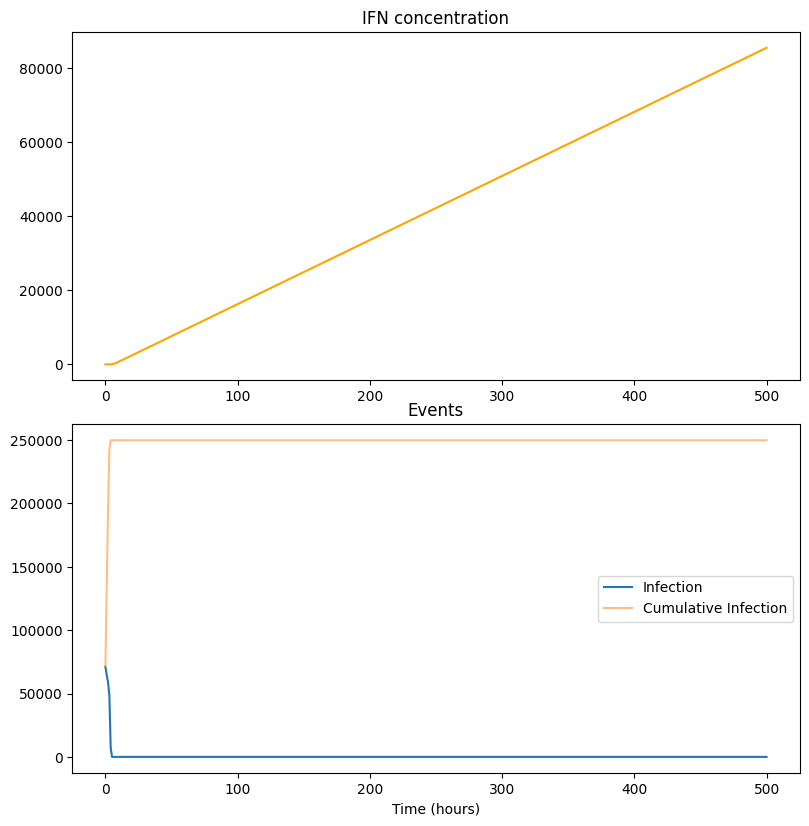

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
fig.tight_layout() 
plt.subplot(211)
plt.plot(output[0, :], output[1, :], c='orange')
plt.title('IFN concentration')
plt.subplot(212)
plt.plot(output[0,:], output[2,:], label='Infection')
plt.plot(output[0,:], np.cumsum(output[2,:]), label='Cumulative Infection', alpha=0.5)
plt.title('Events')
plt.xlabel('Time (hours)')
plt.legend()
plt.show()

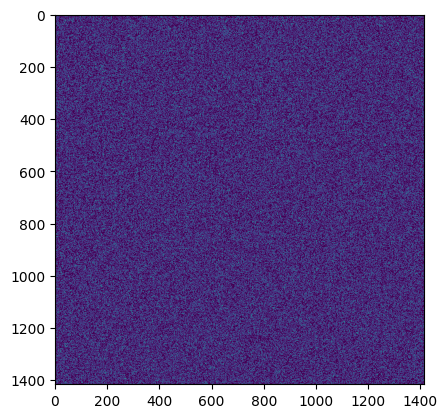

In [125]:
plt.imshow(flatten_lattice(model.infected))
plt.show()